## TAF1/ SGD : Stochastic Gradient Descent. boucle de la regression linéaire, fonction Train() avec SGD

In [15]:
from sklearn.linear_model import SGDRegressor
import pandas as pd # impotation des données
df=pd.read_excel('data.xlsx')
df.head(3)
X = df.drop('X2', axis = 1) # sélectionnez toutes les colonnes sauf la variable cible
y = df['Y'] # sélectionnez la variable cible

regr = SGDRegressor(max_iter=1000, eta0=0.01) # initiez le modèle de régression linéaire

for i in range(100): # exécutez la boucle 100 fois 
    regr.partial_fit(X, y) # exécutez la méthode partial_fit() pour ajuster les coefficients du modèle à chaque itération
    
print(regr)    


SGDRegressor()


In [13]:
df=pd.read_excel('data.xlsx')
df.head(3)

,,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Charger les données à partir du fichier CSV en utilisant pandas
data = pd.read_csv('Data.csv')

# Séparer les caractéristiques de la variable cible
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normaliser les caractéristiques
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Initialiser les paramètres de régression aléatoirement
theta = np.random.rand(X.shape[1])

# Définir les hyperparamètres de la descente de gradient stochastique
alpha = 0.01  # taux d'apprentissage
epochs = 100  # nombre d'itérations sur l'ensemble des données
batch_size = 10  # taille de lot

# Boucle d'apprentissage
for epoch in range(epochs):
    # Mélanger les données pour la descente de gradient stochastique
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    # Parcourir les données en lots
    for i in range(0, X.shape[0], batch_size):
        # Sélectionner un lot d'exemples
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        
        # Calculer la prédiction et l'erreur
        y_pred = np.dot(X_batch, theta)
        error = y_pred - y_batch
        
        # Mettre à jour les paramètres de régression
        gradient = np.dot(X_batch.T, error) / batch_size
        theta -= alpha * gradient
    
    # Calculer le coût moyen pour chaque époque
    cost = np.mean((np.dot(X, theta) - y) ** 2)
    print(f"Epoch {epoch+1}/{epochs}, Cost: {cost:.4f}")

# Afficher les paramètres de régression appris
print("Coefficients de régression: ", theta)

Epoch 1/100, Cost: 2.2461
Epoch 2/100, Cost: 1.9987
Epoch 3/100, Cost: 1.8354
Epoch 4/100, Cost: 1.7317
Epoch 5/100, Cost: 1.6638
Epoch 6/100, Cost: 1.6161
Epoch 7/100, Cost: 1.5819
Epoch 8/100, Cost: 1.5579
Epoch 9/100, Cost: 1.5397
Epoch 10/100, Cost: 1.5261
Epoch 11/100, Cost: 1.5162
Epoch 12/100, Cost: 1.5088
Epoch 13/100, Cost: 1.5032
Epoch 14/100, Cost: 1.4988
Epoch 15/100, Cost: 1.4955
Epoch 16/100, Cost: 1.4929
Epoch 17/100, Cost: 1.4910
Epoch 18/100, Cost: 1.4894
Epoch 19/100, Cost: 1.4882
Epoch 20/100, Cost: 1.4873
Epoch 21/100, Cost: 1.4865
Epoch 22/100, Cost: 1.4860
Epoch 23/100, Cost: 1.4855
Epoch 24/100, Cost: 1.4850
Epoch 25/100, Cost: 1.4846
Epoch 26/100, Cost: 1.4842
Epoch 27/100, Cost: 1.4839
Epoch 28/100, Cost: 1.4836
Epoch 29/100, Cost: 1.4833
Epoch 30/100, Cost: 1.4831
Epoch 31/100, Cost: 1.4829
Epoch 32/100, Cost: 1.4827
Epoch 33/100, Cost: 1.4825
Epoch 34/100, Cost: 1.4823
Epoch 35/100, Cost: 1.4821
Epoch 36/100, Cost: 1.4819
Epoch 37/100, Cost: 1.4818
Epoch 38/1

In [ ]:
data = pd.read_csv('Data.csv')
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

model = Train(X_train, y_train)

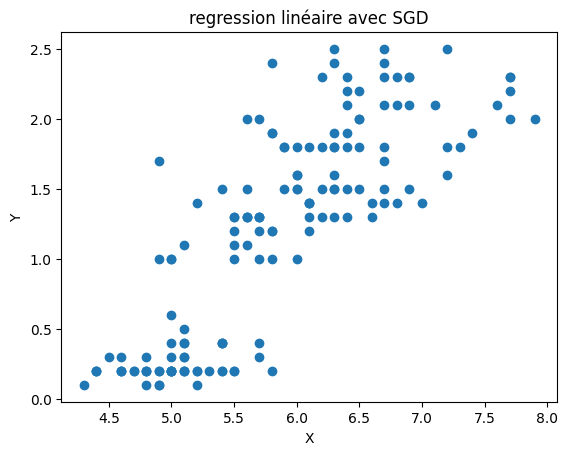

In [ ]:
#visualisation données
plt.scatter(X_train[:, 0], y_train)
plt.title("regression linéaire avec SGD")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

  _

##  TAF2/ RL : Regression Linéaire, fontion Train() avec SKlearn

In [29]:
def split_data(df, train_percent):
  np.random.seed(0)
  perm=np.random.permutation(df.index)
  n=len(df)

  train_index=int(train_percent*n)
  train=df.iloc[perm[:train_index]]
  test=df.iloc[perm[train_index:]]

  X_train=train.iloc[:, :-1]
  Y_train=train.iloc[:, -1]

  X_test=test.iloc[:, :-1]
  Y_test= test.iloc[:,-1]

  return X_train, X_test, Y_train, Y_test

In [30]:
X_train, X_test, Y_train, Y_test=split_data(data, 0.8)

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def Train(X, y, lr, epoch):
    m = len(y)
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    theta = np.zeros(X_new.shape[1])

    cost_history = np.zeros(epoch)

    for i in range(epoch):
        reg = SGDRegressor(alpha=0.0, learning_rate='constant', eta0=lr, max_iter=1)
        reg.fit(X_new, y)
        theta_new = np.append(reg.intercept_, reg.coef_[1:])
        theta = theta_new
        cost_history[i] = mean_squared_error(y, X_new.dot(theta))

    return theta, cost_history

def predict(X,theta):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    yPred = X_new @ theta
    return yPred

def mse(y, yPred):
  mse=np.square(np.subtract(y,yPred)).mean()

  return mse

In [32]:
theta, loss_history=Train(X, y, 0.000000099, 2000)

c:\Users\FOURISSOU.A.LW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\FOURISSOU.A.LW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\FOURISSOU.A.LW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\FOURISSOU.A.LW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iter

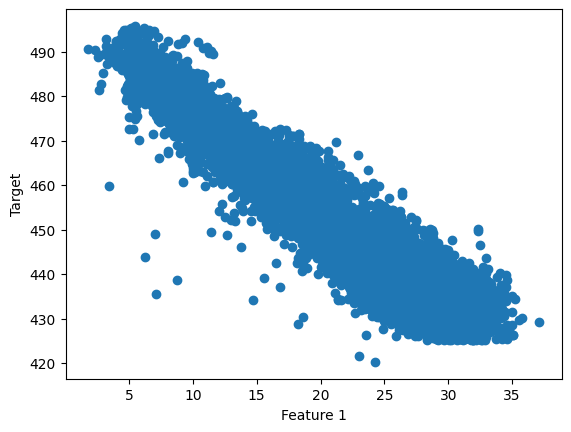

In [17]:
plt.scatter(X_train[:, 0], y_train)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()

_

## TAF3/ LR : Logistic Regression avec SKlearn

In [45]:
from sklearn.linear_model import LogisticRegression

# Définir les données
X = [[5.1, 3.5, 1.4, 0.2],
     [4.9, 3.0, 1.4, 0.2],
     [4.7, 3.2, 1.3, 0.2],
     [4.6, 3.1, 1.5, 0.2],
     [5.0, 3.6, 1.4, 0.2]]

y = [0, 8, 0, 0, 1]

# Initialiser le modèle de régression logistique
reg = LogisticRegression()

# Boucle d'entraînement
for i in range(10):
    # Entraîner le modèle sur l'ensemble d'entraînement
    reg.fit(X, y)

    # Calculer l'exactitude de l'entraînement et du test
    train_accuracy = reg.score(X, y)

    # Afficher les résultats
    print(f"Iteration {i+1}")
    print(f"Training accuracy: {train_accuracy:.2f}")

Iteration 1
Training accuracy: 0.60
Iteration 2
Training accuracy: 0.60
Iteration 3
Training accuracy: 0.60
Iteration 4
Training accuracy: 0.60
Iteration 5
Training accuracy: 0.60
Iteration 6
Training accuracy: 0.60
Iteration 7
Training accuracy: 0.60
Iteration 8
Training accuracy: 0.60
Iteration 9
Training accuracy: 0.60
Iteration 10
Training accuracy: 0.60


_

## TAF4/  PCA : Principal Component Analysis avec SKlearn

Cet exemple charge les données à partir d’un fichier excel et divise les données en ensembles d’entraînement et de test. Ensuite, il initialise le modèle PCA et applique PCA aux données d’entraînement. Enfin, il affiche les résultats, y compris le ratio de variance expliquée et les deux premiers composants principaux.

In [49]:
from sklearn.decomposition import PCA
import pandas as pd

# Charger les données
data = pd.read_excel('data.xlsx')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test = train_test_split(data.drop("Y", axis=1), test_size=0.2)

# Initialiser le modèle PCA
pca = PCA(n_components=2)

# Appliquer PCA aux données d'entraînement
X_train_pca = pca.fit_transform(X_train)

# Afficher les résultats
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"First principal component: {pca.components_[0]}")
print(f"Second principal component: {pca.components_[1]}")


Explained variance ratio: [0.63046084 0.29174904]
First principal component: [ 0.38204974  0.57306773 -0.12410591 -0.71430323]
Second principal component: [-0.21199483 -0.67011184  0.19327754 -0.6845817 ]
